# Time series forecasting in TensorFlow (Bitcoin Price Prediction) 

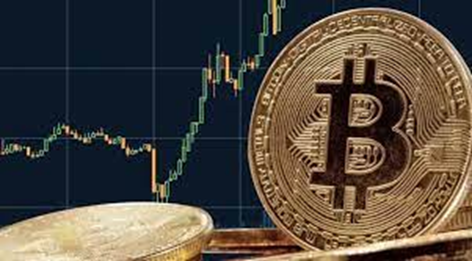

### Time series forecasting is the process of analyzing time series data using statistics and modeling to make predictions and inform strategic decision-making.

Forecasting has a range of applications in various industries. It has tons of practical applications including: weather forecasting, climate forecasting, economic forecasting, healthcare forecasting engineering forecasting, finance forecasting, retail forecasting, business forecasting, environmental studies forecasting, social studies forecasting, and more.

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
df = pd.read_csv(r"/Bitcoin_dataset.csv", parse_dates = ['Date'] , index_col = ["Date"])

In [ ]:
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)


2787

In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


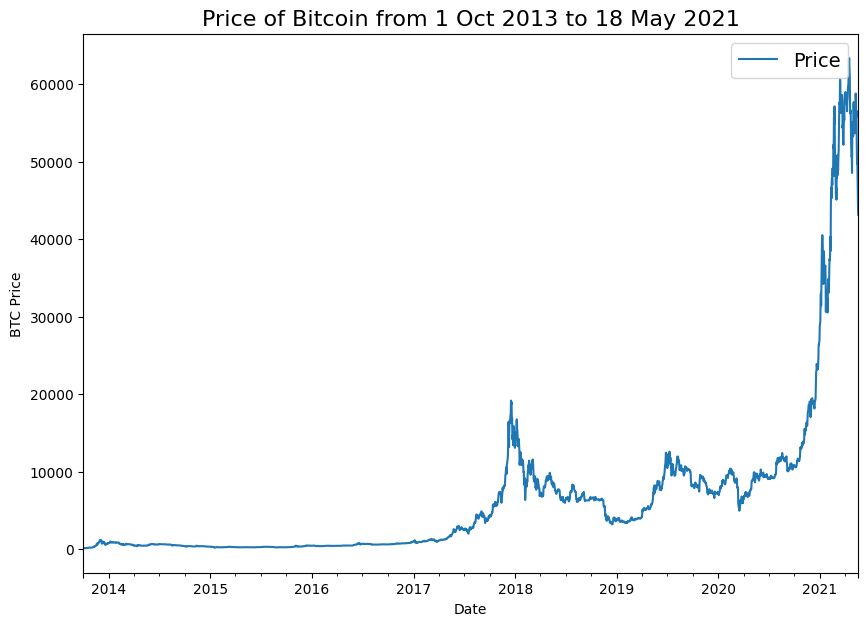

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/Bitcoin_dataset.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

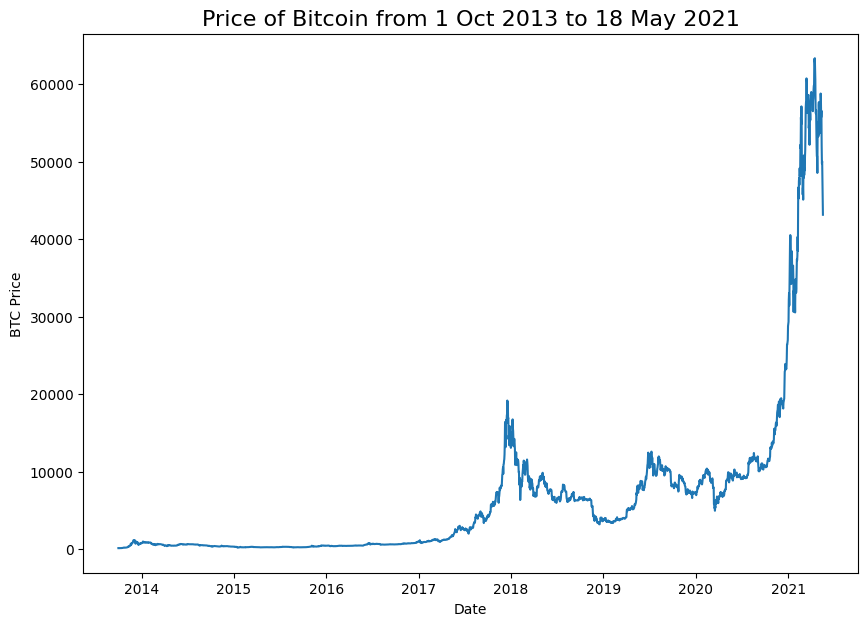

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

# train & test sets for time series 

In [ ]:
prices = bitcoin_prices["Price"].to_numpy()


In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

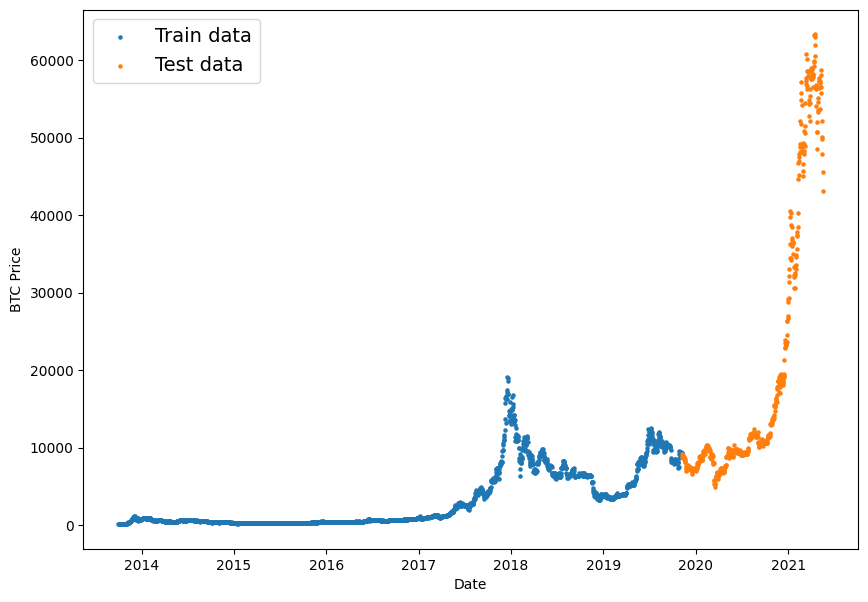

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

# Create a plotting function


In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

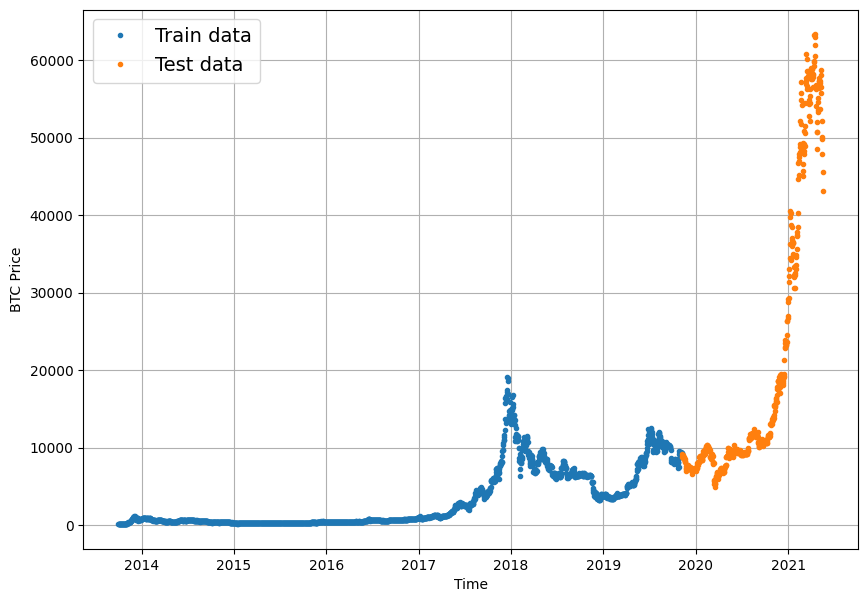

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# Model 0: Naïve forecast (baseline)


In [ ]:
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 
     

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

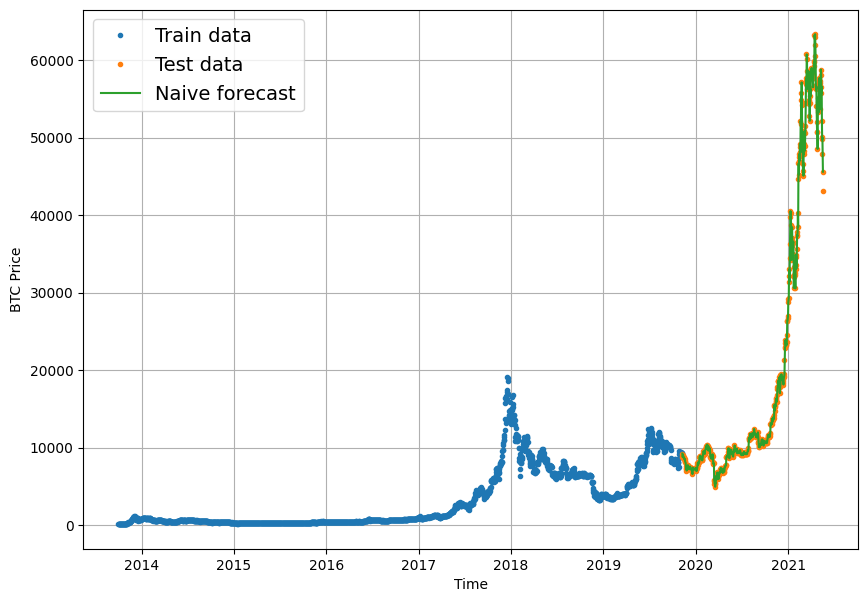

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");
     

The naive forecast looks like it's following the data well.

Let's zoom in to take a better look.

We can do so by creating an offset value and passing it to the start parameter of our plot_time_series() function.

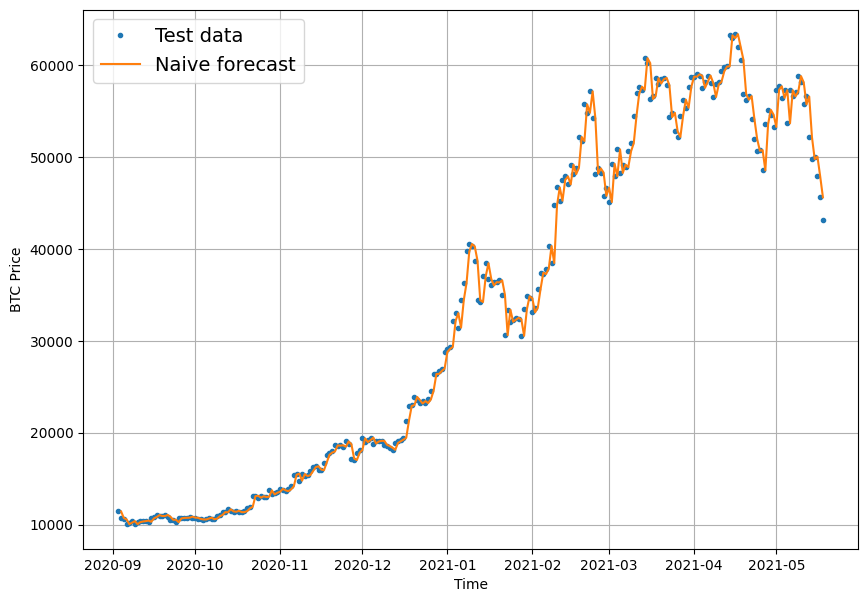

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");


When we zoom in we see the naïve forecast comes slightly after the test data. This makes sense because the naive forecast uses the previous timestep value to predict the next timestep value.

Forecast made. Time to evaluate it.

# Evaluating a time series model


Time series forecasting often involves predicting a number (in our case, the price of Bitcoin) and it is a regression problem.

With this known, we can use regression evaluation metrics to evaluate our time series forecasts.

Easy to interpret (a forecast is X amount different from actual amount). Forecast methods which minimises the MAE will lead to forecasts of the median.

Forecasts which minimise the RMSE lead to forecasts of the mean.

## Percentage errors
Percentage errors do not have units, this means they can be used to compare forecasts across different datasets.

MAPE (mean absolute percentage error)	Most commonly used percentage error. May explode (not work) if y=0.

 sMAPE  (symmetric mean absolute percentage error)	Recommended not to be used by Forecasting: Principles and Practice, though it is used in forecasting competitions.

## Scaled errors
Scaled errors are an alternative to percentage errors when comparing forecast performance across different time series.

MASE equals one for the naive forecast (or very close to one). A forecast which performs better than the naïve should get <1 MASE.

There are so many metrics... which one should I pay most attention to? It's going to depend on your problem.

Since we're going to be evaluing a lot of models, let's write a function to help us calculate evaluation metrics on their forecasts.



#### Mean Absolute Scaled Error (MASE) in Forecasting
In time series forecasting, Mean Absolute Scaled Error (MASE) is a measure for determining the effectiveness of forecasts generated through an algorithm by comparing the predictions with the output of a naïve forecasting approach. Let’s break this down to understand in detail:

In [ ]:
import tensorflow as tf


In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In practice, if we've created the function correctly, the naïve model should achieve an MASE of 1 (or very close to 1). Any model worse than the naïve forecast will achieve an MASE of >1 and any model better than the naïve forecast will achieve an MASE of <1.

### Let's put each of our different evaluation metrics together into a function.

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}
     

The .numpy() method is used to convert the TensorFlow tensor object to a NumPy array, which makes it easier to work with in Python.

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

Taking a look at the naïve forecast's MAE, it seems on average each forecast is ~$567 different than the actual Bitcoin price.

How does this compare to the average price of Bitcoin in the test dataset?

In [ ]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737226

Okay, looking at these two values is starting to give us an idea of how our model is performing:

The average price of Bitcoin in the test dataset is: $20,056 (note: average may not be the best measure here, since the highest price is over 3x this value and the lowest price is over 4x lower)

Each prediction in naive forecast is on average off by: $567

Is this enough to say it's a good model?

That's up your own interpretation. Personally, I'd prefer a model which was closer to the mark.

How about we try and build one?


### Format Data Part 2: Windowing dataset

#### Windowing is a method to turn a time series dataset into supervised learning problem.



For example for a univariate time series, windowing for one week (window=7) to predict the next single value (horizon=1) might look like:

Window for one week (univariate time series)

In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")
     

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels
     

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")
     

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


# Turning windows into training and test sets


In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:

# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

# Model 1: Dense model (window = 7, horizon = 1)


#### model_1 will have:

A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation

An output layer with linear activation (or no activation)

Adam optimizer and MAE loss function

Batch size of 128

100 epochs

### Let's import TensorFlow and build our first deep learning model for time series.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
 1/18 [>.............................] - ETA: 14s - loss: 4067.5308 - mae: 4067.5308

18/18 [==============================] - 2s 70ms/step - loss: 1836.8223 - mae: 1836.8223 - val_loss: 1524.3516 - val_mae: 1524.3516
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 368.1874 - mae: 368.1874 - val_loss: 1865.4095 - val_mae: 1865.4095
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 253.4441 - mae: 253.4441

18/18 [==============================] - 1s 72ms/step - loss: 206.1449 - mae: 206.1449 - val_loss: 1159.4781 - val_mae: 1159.4781
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 213.8994 - mae: 213.8994

18/18 [==============================] - 1s 47ms/step - loss: 164.6133 - mae: 164.6133 - val_loss: 880.6157 - val_mae: 880.6156
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 144.4043 - mae: 144.4043

18/18 [==============================] - 1s 35ms/step - loss: 151.3628 - mae: 151.3628 - val_loss: 823.8688 - val_mae: 823.8688
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 113.5288 - mae: 113.5288

18/18 [==============================] - 1s 34ms/step - loss: 148.1521 - mae: 148.1521 - val_loss: 808.1607 - val_mae: 808.1606
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 177.0652 - mae: 177.0652

18/18 [==============================] - 1s 34ms/step - loss: 145.4932 - mae: 145.4932 - val_loss: 781.6151 - val_mae: 781.6151
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 126.1890 - mae: 126.1890

18/18 [==============================] - 1s 35ms/step - loss: 140.4117 - mae: 140.4117 - val_loss: 763.6691 - val_mae: 763.6691
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 126.6720 - mae: 126.6720

18/18 [==============================] - 1s 36ms/step - loss: 139.6721 - mae: 139.6721 - val_loss: 749.0808 - val_mae: 749.0808
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 134.2546 - mae: 134.2546

18/18 [==============================] - 1s 37ms/step - loss: 135.1456 - mae: 135.1456 - val_loss: 727.7626 - val_mae: 727.7626
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 131.7993 - mae: 131.7993

18/18 [==============================] - 1s 34ms/step - loss: 130.7294 - mae: 130.7294 - val_loss: 726.2973 - val_mae: 726.2973
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 131.2903 - mae: 131.2903 - val_loss: 812.5106 - val_mae: 812.5106
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 134.8871 - mae: 134.8871 - val_loss: 772.9378 - val_mae: 772.9378
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 141.0312 - mae: 141.0312

18/18 [==============================] - 1s 36ms/step - loss: 127.8251 - mae: 127.8251 - val_loss: 689.7177 - val_mae: 689.7177
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 116.9754 - mae: 116.9754

18/18 [==============================] - 1s 36ms/step - loss: 126.7251 - mae: 126.7251 - val_loss: 670.5872 - val_mae: 670.5872
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 106.8936 - mae: 106.8936

18/18 [==============================] - 1s 37ms/step - loss: 122.7160 - mae: 122.7160 - val_loss: 670.1392 - val_mae: 670.1392
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 121.9679 - mae: 121.9679 - val_loss: 691.7735 - val_mae: 691.7735
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 137.7602 - mae: 137.7602

18/18 [==============================] - 1s 33ms/step - loss: 122.9314 - mae: 122.9314 - val_loss: 648.6165 - val_mae: 648.6165
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 121.4079 - mae: 121.4079 - val_loss: 677.6548 - val_mae: 677.6548
Epoch 20/100
18/18 [==============================] - 0s 4ms/step - loss: 120.3325 - mae: 120.3325 - val_loss: 656.9773 - val_mae: 656.9773
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 133.1117 - mae: 133.1117

18/18 [==============================] - 1s 34ms/step - loss: 121.4667 - mae: 121.4667 - val_loss: 635.5721 - val_mae: 635.5721
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 179.4086 - mae: 179.4086

18/18 [==============================] - 1s 35ms/step - loss: 119.4195 - mae: 119.4195 - val_loss: 632.0437 - val_mae: 632.0437
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 118.9302 - mae: 118.9302 - val_loss: 633.1989 - val_mae: 633.1989
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 127.9516 - mae: 127.9516

18/18 [==============================] - 1s 53ms/step - loss: 117.8350 - mae: 117.8350 - val_loss: 627.8651 - val_mae: 627.8651
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 129.9503 - mae: 129.9503

18/18 [==============================] - 1s 39ms/step - loss: 115.7698 - mae: 115.7698 - val_loss: 622.5510 - val_mae: 622.5510
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 116.5720 - mae: 116.5720

18/18 [==============================] - 1s 51ms/step - loss: 116.6171 - mae: 116.6171 - val_loss: 617.8754 - val_mae: 617.8754
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 162.8814 - mae: 162.8814

18/18 [==============================] - 1s 49ms/step - loss: 117.8632 - mae: 117.8632 - val_loss: 617.5093 - val_mae: 617.5093
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 107.7412 - mae: 107.7412

18/18 [==============================] - 1s 49ms/step - loss: 115.4784 - mae: 115.4784 - val_loss: 615.0994 - val_mae: 615.0994
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 114.3768 - mae: 114.3768 - val_loss: 636.2161 - val_mae: 636.2161
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 121.6467 - mae: 121.6467 - val_loss: 645.8654 - val_mae: 645.8654
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 122.5432 - mae: 122.5432 - val_loss: 707.5619 - val_mae: 707.5619
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 127.4928 - mae: 127.4928

18/18 [==============================] - 1s 34ms/step - loss: 118.0824 - mae: 118.0824 - val_loss: 604.0996 - val_mae: 604.0996
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 115.2365 - mae: 115.2365 - val_loss: 611.7772 - val_mae: 611.7772
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 119.9714 - mae: 119.9714

18/18 [==============================] - 1s 37ms/step - loss: 112.3590 - mae: 112.3590 - val_loss: 601.7371 - val_mae: 601.7371
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 99.4905 - mae: 99.4905

18/18 [==============================] - 1s 34ms/step - loss: 111.3640 - mae: 111.3640 - val_loss: 596.6318 - val_mae: 596.6318
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 120.5896 - mae: 120.5896 - val_loss: 628.9122 - val_mae: 628.9122
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 115.5231 - mae: 115.5231 - val_loss: 616.0641 - val_mae: 616.0641
Epoch 38/100
18/18 [==============================] - 0s 4ms/step - loss: 113.7047 - mae: 113.7047 - val_loss: 616.9220 - val_mae: 616.9220
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6333 - mae: 112.6333 - val_loss: 598.4155 - val_mae: 598.4155
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 107.7729 - mae: 107.7729

18/18 [==============================] - 1s 35ms/step - loss: 110.5749 - mae: 110.5749 - val_loss: 590.4827 - val_mae: 590.4827
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8497 - mae: 111.8497 - val_loss: 656.6812 - val_mae: 656.6812
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 115.9959 - mae: 115.9959 - val_loss: 621.7552 - val_mae: 621.7552
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 112.9191 - mae: 112.9191 - val_loss: 647.2496 - val_mae: 647.2496
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 75.2273 - mae: 75.2273

18/18 [==============================] - 1s 34ms/step - loss: 112.3556 - mae: 112.3556 - val_loss: 587.0323 - val_mae: 587.0323
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 85.1900 - mae: 85.1900

18/18 [==============================] - 1s 35ms/step - loss: 109.3588 - mae: 109.3588 - val_loss: 586.6491 - val_mae: 586.6491
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 110.9484 - mae: 110.9484 - val_loss: 601.3020 - val_mae: 601.3020
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 115.6164 - mae: 115.6164 - val_loss: 628.4687 - val_mae: 628.4687
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 109.9998 - mae: 109.9998 - val_loss: 590.8693 - val_mae: 590.8693
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 109.2299 - mae: 109.2299 - val_loss: 633.0012 - val_mae: 633.0012
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 131.2668 - mae: 131.2668

18/18 [==============================] - 1s 35ms/step - loss: 116.1401 - mae: 116.1401 - val_loss: 583.6843 - val_mae: 583.6843
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 109.3899 - mae: 109.3899 - val_loss: 600.9096 - val_mae: 600.9096
Epoch 52/100
18/18 [==============================] - 0s 4ms/step - loss: 111.6705 - mae: 111.6705 - val_loss: 590.5580 - val_mae: 590.5580
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 111.4817 - mae: 111.4817 - val_loss: 666.8303 - val_mae: 666.8303
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 115.0992 - mae: 115.0992 - val_loss: 632.9633 - val_mae: 632.9633
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 112.5334 - mae: 112.5334 - val_loss: 585.3351 - val_mae: 585.3351
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 111.2083 - mae: 111.2083 - val_loss: 769.8555 - val_mae: 769.8555
Epoch 57/100
18/18 [============

18/18 [==============================] - 1s 37ms/step - loss: 109.4211 - mae: 109.4211 - val_loss: 582.7291 - val_mae: 582.7291
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 72.8698 - mae: 72.8698

18/18 [==============================] - 1s 36ms/step - loss: 107.3373 - mae: 107.3373 - val_loss: 581.2873 - val_mae: 581.2873
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 111.5873 - mae: 111.5873 - val_loss: 638.0451 - val_mae: 638.0451
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9528 - mae: 109.9528 - val_loss: 601.1837 - val_mae: 601.1837
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 133.7698 - mae: 133.7698

18/18 [==============================] - 1s 51ms/step - loss: 109.2143 - mae: 109.2143 - val_loss: 576.3271 - val_mae: 576.3271
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2140 - mae: 108.2140 - val_loss: 587.3024 - val_mae: 587.3024
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 107.5833 - mae: 107.5833 - val_loss: 642.5845 - val_mae: 642.5845
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 118.6021 - mae: 118.6021 - val_loss: 732.3632 - val_mae: 732.3632
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 122.7621 - mae: 122.7621 - val_loss: 598.0338 - val_mae: 598.0338
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 127.4171 - mae: 127.4171 - val_loss: 582.0851 - val_mae: 582.0851
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 114.7564 - mae: 114.7564 - val_loss: 632.8301 - val_mae: 632.8301
Epoch 72/100
18/18 [============

18/18 [==============================] - 1s 36ms/step - loss: 108.7213 - mae: 108.7213 - val_loss: 576.0377 - val_mae: 576.0377
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6625 - mae: 106.6625 - val_loss: 584.5103 - val_mae: 584.5103
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8835 - mae: 107.8835 - val_loss: 587.3338 - val_mae: 587.3338
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 106.9959 - mae: 106.9959 - val_loss: 584.4331 - val_mae: 584.4331
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 107.9142 - mae: 107.9142 - val_loss: 582.7090 - val_mae: 582.7090
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 92.4394 - mae: 92.4394

18/18 [==============================] - 1s 49ms/step - loss: 106.1354 - mae: 106.1354 - val_loss: 575.1890 - val_mae: 575.1890
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 185.7622 - mae: 185.7622

18/18 [==============================] - 1s 50ms/step - loss: 114.5395 - mae: 114.5395 - val_loss: 571.7305 - val_mae: 571.7305
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8345 - mae: 111.8345 - val_loss: 670.6024 - val_mae: 670.6024
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7832 - mae: 112.7832 - val_loss: 623.7516 - val_mae: 623.7516
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9065 - mae: 107.9065 - val_loss: 587.3118 - val_mae: 587.3118
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 106.4538 - mae: 106.4538 - val_loss: 573.1289 - val_mae: 573.1289
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 107.4948 - mae: 107.4948 - val_loss: 576.9190 - val_mae: 576.9190
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8955 - mae: 106.8955 - val_loss: 601.7378 - val_mae: 601.7378
Epoch 89/100
 1/18 [>...........

18/18 [==============================] - 1s 34ms/step - loss: 107.3373 - mae: 107.3373 - val_loss: 570.7909 - val_mae: 570.7909
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 105.2116 - mae: 105.2116 - val_loss: 597.2650 - val_mae: 597.2650
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 108.9709 - mae: 108.9709 - val_loss: 615.9186 - val_mae: 615.9186
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 108.9189 - mae: 108.9189 - val_loss: 583.7074 - val_mae: 583.7074
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 116.6249 - mae: 116.6249 - val_loss: 667.1456 - val_mae: 667.1456
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8074 - mae: 113.8074 - val_loss: 583.4714 - val_mae: 583.4714
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 107.4825 - mae: 107.4825 - val_loss: 571.6339 - val_mae: 571.6339
Epoch 96/100
18/18 [============

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)
     

18/18 [==============================] - 0s 2ms/step - loss: 693.1984 - mae: 693.1984


[693.1983642578125, 693.1983642578125]

Much better! Due to the fluctuating performance of the model during training, loading back in the best performing model see's a sizeable improvement in MAE.



# Making forecasts with a model (on the test dataset)
We've trained a model and evaluated the it on the test data, but the project we're working on is called BitPredict 💰📈 so how do you think we could use our model to make predictions?

Since we're going to be running more modelling experiments, let's write a function which:

Takes in a trained model (just like model_1)
Takes in some input data (just like the data the model was trained on)
Passes the input data to the model's predict() method
Returns the predictions

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]


18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8644.307, 8577.796, 8837.266, 8596.299, 8550.536, 8555.41 ,
        8467.076, 8360.892, 8255.743, 8344.288], dtype=float32)>)

 Note: With these outputs, our model isn't forecasting yet. It's only making predictions on the test dataset. Forecasting would involve a model making predictions into the future, however, the test dataset is only a pseudofuture.

Excellent! Now we've got some prediction values, let's use the evaluate_preds() we created before to compare them to the ground truth.



In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 693.1983,
 'mse': 1442360.0,
 'rmse': 1200.9829,
 'mape': 3.2366161,
 'mase': 1.2177575}

In [ ]:

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

It looks like our naïve model beats our first deep model on nearly every metric.

That goes to show the power of the naïve model and the reason for having a baseline for any machine learning project.

And of course, no evaluation would be finished without visualizing the results.

Let's use the plot_time_series() function to plot model_1_preds against the test data.



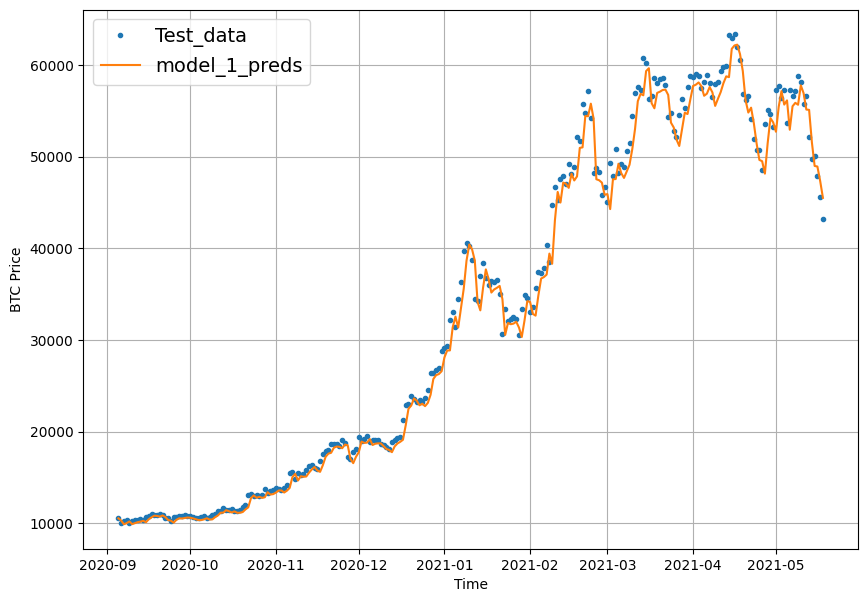

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")
     

What's wrong with these predictions?

As mentioned before, they're on the test dataset. So they're not actual forecasts.

With our current model setup, how do you think we'd make forecasts for the future?

Have a think about it for now, we'll cover this later on

# Model 2: Dense (window = 30, horizon = 1)


A naïve model is currently beating our handcrafted deep learning model.

We can't let this happen.

Let's continue our modelling experiments.

We'll keep the previous model architecture but use a window size of 30.

In other words, we'll use the previous 30 days of Bitcoin prices to try and predict the next day price.

In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Once again, training goes nice and fast.

Let's evaluate our model's performance.

In [ ]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)
     

18/18 [==============================] - 0s 1ms/step - loss: 687.7854


687.785400390625

Hmmm... is that the best it did?

How about we try loading in the best performing model_2 which was saved to file thanks to our ModelCheckpoint callback.

In [ ]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 593.4080


593.407958984375

In [ ]:

# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 1ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 593.4079,
 'mse': 1214097.1,
 'rmse': 1101.8607,
 'mape': 2.7056334,
 'mase': 1.0372827}

It looks like model_2 performs worse than the naïve model as well as model_1!

Does this mean a smaller window size is better? (I'll leave this as a challenge you can experiment with)

How do the predictions look?

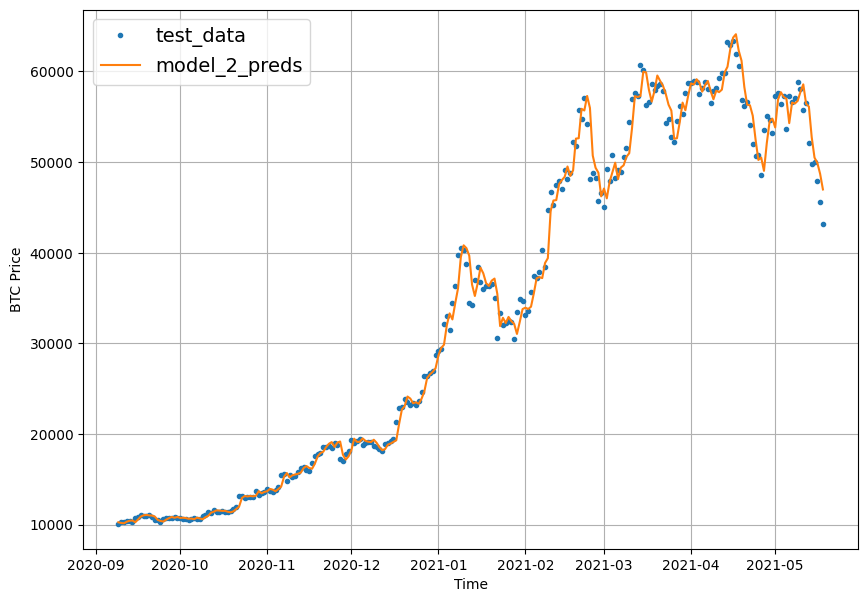

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

# Model 3: Dense (window = 30, horizon = 7)

Let's try and predict 7 days ahead given the previous 30 days.

First, we'll update the HORIZON and WINDOW_SIZE variables and create windowed data.

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

And we'll split the full dataset windows into training and test sets.



In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

Now let's build, compile, fit and evaluate a model.



In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1334.5610


1334.56103515625

To compare apples to apples (best performing model to best performing model), we've got to load in the best version of model_3.

In [ ]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1239.8861


1239.8861083984375

In this case, the error will be higher because we're predicting 7 steps at a time.

This makes sense though because the further you try and predict, the larger your error will be (think of trying to predict the weather 7 days in advance).

Let's make predictions with our model using the make_preds() function and evaluate them using the evaluate_preds() function.

In [ ]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9304.274 , 9422.366 , 9623.6455, 9461.244 , 9189.713 , 9449.553 ,
        9610.026 ],
       [8926.76  , 8965.0205, 9274.665 , 9202.466 , 9068.607 , 9172.475 ,
        9214.405 ],
       [8855.832 , 8895.42  , 9117.623 , 9121.727 , 8957.332 , 9174.216 ,
        9335.285 ],
       [9014.429 , 9021.001 , 9202.062 , 9284.35  , 9164.687 , 9472.792 ,
        9578.534 ],
       [8835.907 , 8927.366 , 9150.377 , 9063.148 , 9049.314 , 9188.668 ,
        9201.196 ]], dtype=float32)>

In [ ]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 644.04535 ,  399.70578 ,  425.4478  ,  621.6702  ,  505.07758 ,
         494.32248 ,  456.6448  ,  491.0941  ,  559.4279  ,  651.97906 ,
         839.35706 ,  780.29755 ,  819.1378  ,  844.81506 ,  558.4112  ,
         293.669   ,  172.51479 ,  259.43045 ,  238.46742 ,  297.37466 ,
         138.45467 ,  186.73988 ,  324.3365  ,  270.97287 ,  210.28223 ,
         188.24693 ,   73.317665,  157.47258 ,  124.52672 ,  168.29164 ,
         233.78627 ,  363.47916 ,  335.73605 ,  345.94113 ,  331.36182 ,
         318.91986 ,  332.68918 ,  235.9075  ,  213.64314 ,  187.71945 ,
         459.40738 ,   90.60491 ,   67.14425 ,   88.48507 ,  147.6499  ,
          72.25893 ,  121.23954 ,   93.35868 ,   92.97377 ,  136.47586 ,
         179.06285 ,  167.45041 ,  162.9031  ,  204.61565 ,  237.3284  ,
         323.3271  ,  453.36627 ,  409.11844 ,  487.55844 ,  525.1053  ,
         339.44482 ,  207.11043 ,  224.4343  ,  289.0231  ,  387.65338 ,
         420.2959  ,  437.00473 ,  415.4146 

# Make our evaluation function work for larger horizons

You'll notice the outputs for model_3_results are multi-dimensional.

This is because the predictions are getting evaluated across the HORIZON timesteps (7 predictions at a time).

To fix this, let's adjust our evaluate_preds() function to work with multiple shapes of data.

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

Now we've updated evaluate_preds() to work with multiple shapes, how does it look?

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results
     

{'mae': 1239.8862,
 'mse': 5412716.5,
 'rmse': 1428.3867,
 'mape': 5.576416,
 'mase': 2.206308}

Time to visualize.

If our prediction evaluation metrics were mutli-dimensional, how do you think the predictions will look like if we plot them?

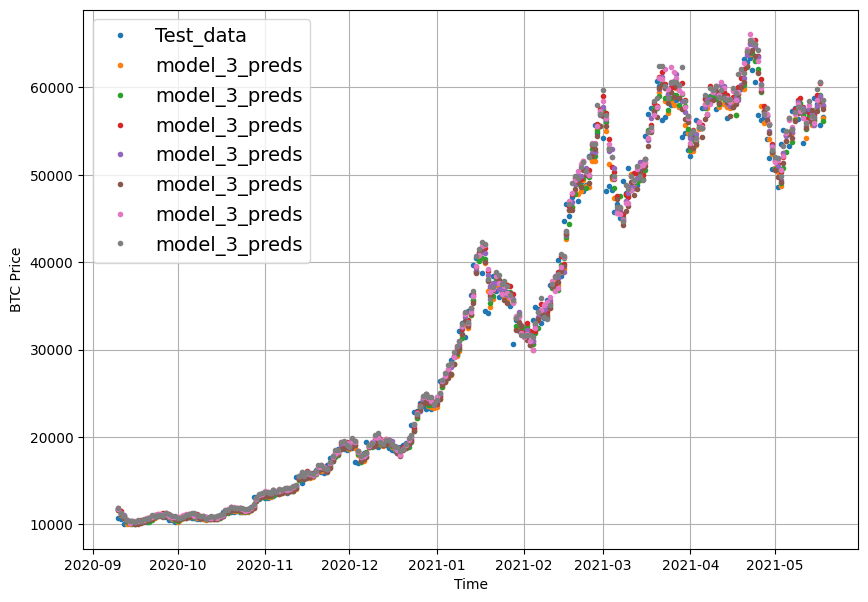

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")
     

When we try to plot our multi-horizon predicts, we get a funky looking plot.

Again, we can fix this by aggregating our model's predictions.

🔑 Note: Aggregating the predictions (e.g. reducing a 7-day horizon to one value such as the mean) loses information from the original prediction. As in, the model predictions were trained to be made for 7-days but by reducing them to one, we gain the ability to plot them visually but we lose the extra information contained across multiple days.

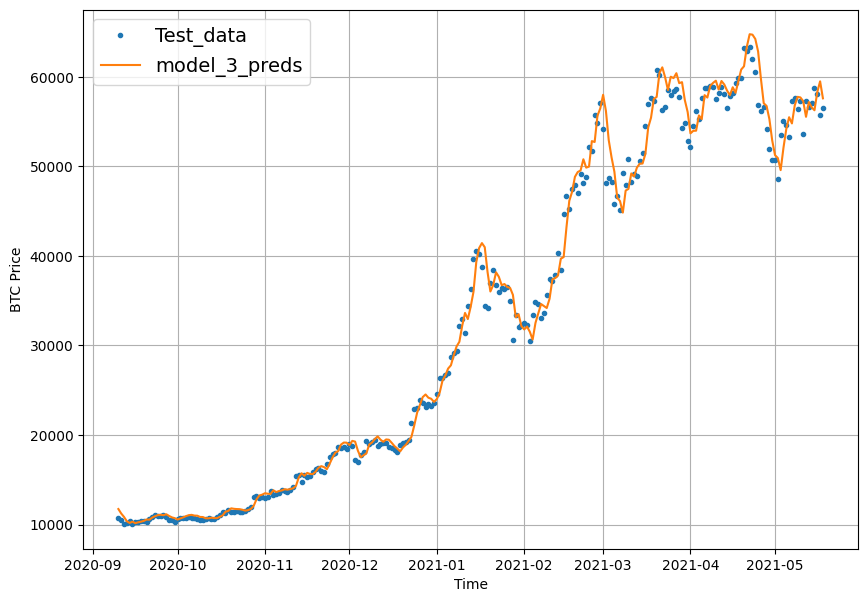

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")

# Which of our models is performing best so far?
So far, we've trained 3 models which use the same architecture but use different data inputs.

Let's compare them with the naïve model to see which model is performing the best so far.

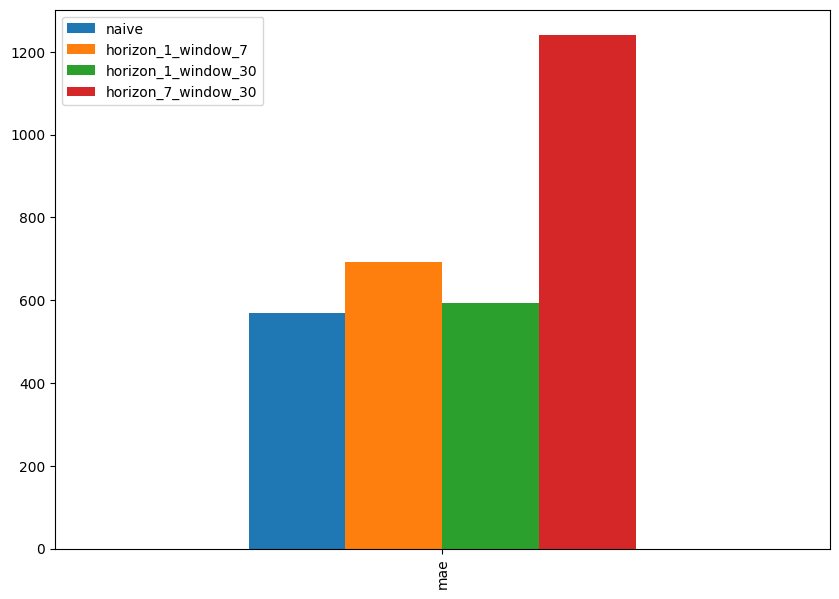

In [ ]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");
     

Woah, our naïve model is performing best (it's very hard to beat a naïve model in open systems) but the dense model with a horizon of 1 and a window size of 7 looks to be performing cloest.

Because of this, let's use HORIZON=1 and WINDOW_SIZE=7 for our next series of modelling experiments (in other words, we'll use the previous week of Bitcoin prices to try and predict the next day).

Woah, our naïve model is performing best (it's very hard to beat a naïve model in open systems) but the dense model with a horizon of 1 and a window size of 7 looks to be performing cloest.

Because of this, let's use HORIZON=1 and WINDOW_SIZE=7 for our next series of modelling experiments (in other words, we'll use the previous week of Bitcoin prices to try and predict the next day).

### why are the naïve results so good? One of the reasons could be due the presence of autocorrelation in the data.
If a time series has autocorrelation it means the value at t+1 (the next timestep) is typically close to the value at t (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is, a naïve model will often get fairly good results.

# Model 4: Conv1D

Onto the next modelling experiment!

This time, we'll be using a Conv1D model. Because as we saw in the sequence modelling notebook, Conv1D models can be used for seq2seq (sequence to sequence) problems.

In our case, the input sequence is the previous 7 days of Bitcoin price data and the output is the next day (in seq2seq terms this is called a many to one problem).

Before we build a Conv1D model, let's recreate our datasets.



In [ ]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [ ]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()


Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 2ms/step - loss: 591.2956


591.2955932617188

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8898.836, 8752.598, 8938.492, 8775.131, 8696.806, 8721.877,
       8657.547, 8500.377, 8443.299, 8475.482], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 591.2956,
 'mse': 1240786.8,
 'rmse': 1113.9061,
 'mape': 2.6610796,
 'mase': 1.0387425}

# Model 5: RNN (LSTM)

we can also use a recurrent neural network to model our sequential time series data.

Let's reuse the same data we used for the Conv1D model, except this time we'll create an LSTM-cell powered RNN to model our Bitcoin data.

In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])
     

In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 588.7802


588.7802124023438

In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8943.376, 8835.978, 8972.41 , 8784.878, 8760.209, 8717.761,
       8706.507, 8565.24 , 8463.599, 8522.513], dtype=float32)>

In [ ]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 588.7802,
 'mse': 1235402.1,
 'rmse': 1111.4865,
 'mape': 2.6803956,
 'mase': 1.0343238}

Hmmm... it seems even with an LSTM-powered RNN we weren't able to beat our naïve models results.

Perhaps adding another variable will help?